In [1]:
import pandas as pd
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head(10)

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
5,5,14661,2007,55405.26,yes
6,6,9990,2002,93415.61,yes
7,7,11599,2008,65265.09,no
8,8,7834,1999,43917.53,yes
9,9,14913,2003,107860.41,yes


In [2]:
renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year':'ano_do_modelo',
    'price':'preço',
    'sold':'vendido'
}
dados.rename(inplace = True, columns = renomear)

In [3]:
dados.head(10)

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preço,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
5,5,14661,2007,55405.26,yes
6,6,9990,2002,93415.61,yes
7,7,11599,2008,65265.09,no
8,8,7834,1999,43917.53,yes
9,9,14913,2003,107860.41,yes


In [4]:
renomear_vendido = {
    'yes' : 1,
    'no': 0
}
dados.vendido = dados.vendido.map(renomear_vendido)

In [5]:
dados.head(10)

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preço,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1
5,5,14661,2007,55405.26,1
6,6,9990,2002,93415.61,1
7,7,11599,2008,65265.09,0
8,8,7834,1999,43917.53,1
9,9,14913,2003,107860.41,1


In [6]:
from datetime import datetime
dados['idade_do_modelo'] = datetime.today().year - dados.ano_do_modelo

In [7]:
dados

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preço,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10
...,...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0,18
9996,9996,13246,2002,107424.63,1,22
9997,9997,13018,2014,93856.99,0,10
9998,9998,10464,2011,51250.57,1,13


In [8]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.km_por_ano = dados.km_por_ano.round(2)
dados

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preço,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,24,35085.22
1,1,7843,1998,40557.96,1,26,12622.05
2,2,7109,2006,89627.50,0,18,11440.80
3,3,26823,2015,95276.14,0,9,43167.33
4,4,7935,2014,117384.68,1,10,12770.11
...,...,...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0,18,25060.64
9996,9996,13246,2002,107424.63,1,22,21317.32
9997,9997,13018,2014,93856.99,0,10,20950.39
9998,9998,10464,2011,51250.57,1,13,16840.13


In [9]:
dados.drop(columns=['Unnamed: 0','milhas_por_ano','ano_do_modelo'], inplace = True)
dados

,preço,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22
1,40557.96,1,26,12622.05
2,89627.50,0,18,11440.80
3,95276.14,0,9,43167.33
4,117384.68,1,10,12770.11
...,...,...,...,...
9995,97112.86,0,18,25060.64
9996,107424.63,1,22,21317.32
9997,93856.99,0,10,20950.39
9998,51250.57,1,13,16840.13


In [10]:
x = dados[['preço', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25)

print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
taxa = accuracy_score(teste_y, previsoes) * 100

print('A taxa de acerto foi de %.2f%%' % taxa )

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A taxa de acerto foi de 59.16%


C:\Users\Lucas\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy = LinearSVC()
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)
taxa = accuracy_score(teste_y, previsoes) * 100

print('A taxa de acerto foi de %.2f%%' % taxa )

A taxa de acerto foi de 59.16%


C:\Users\Lucas\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A taxa de acerto foi de 75.20%


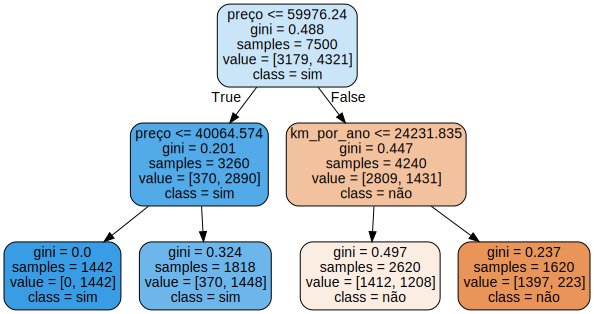

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25)

print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth = 2)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
taxa = accuracy_score(teste_y, previsoes) * 100
print('A taxa de acerto foi de %.2f%%' % taxa )

from sklearn.tree import export_graphviz
import graphviz

features = x.columns

dot_data = export_graphviz(modelo, feature_names = features, filled = True, rounded = True, class_names = ['não', 'sim'])

graphviz.Source(dot_data)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25)

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(treino_x)
teste_x = scaler.transform(teste_x)

print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
taxa = accuracy_score(teste_y, previsoes) * 100
print('A taxa de acerto foi de %.2f%%' % taxa )

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A taxa de acerto foi de 76.80%
